<a href="https://colab.research.google.com/github/amanjeetsahu/311_Service_Request_Analysis/blob/master/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

# Problem Statement

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types. 

# Import Statements

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [0]:
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title 311_Service_Requests_from_2010_to_Present.csv, id 1E1kLsgacvAbjHeaV6WHr2-ggdo9Hd0WQ


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1E1kLsgacvAbjHeaV6WHr2-ggdo9Hd0WQ'
downloaded = drive.CreateFile({'id': file_id})

In [0]:
downloaded.GetContentFile('311_Service_Requests_from_2010_to_Present.csv')

In [0]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', parse_dates= ['Created Date', 'Closed Date'])

In [0]:
# Visualising the Data Set
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


# Exploratory Data Analysis

In [0]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [0]:
df.shape

(364558, 53)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null datetime64[ns]
Closed Date                       362177 non-null datetime64[ns]
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type        

In [0]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [0]:
df.columns= df.columns.str.replace(" ", "_")

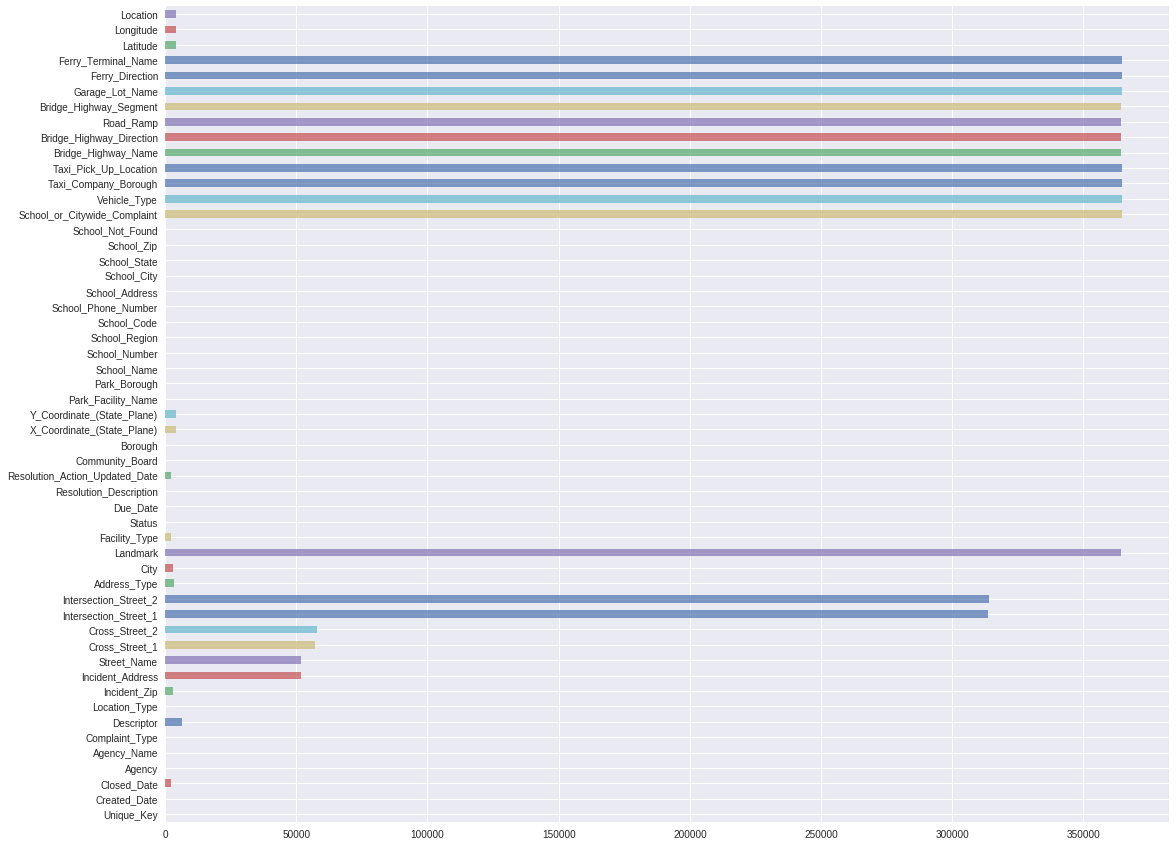

In [0]:
# A Frequncy Plot to show the number of null values in each column of the data
sns.set()
df.isnull().sum().plot(kind='barh', alpha= 0.7, figsize= (18,15))
plt.show()

In [0]:
df[['Closed_Date', 'Created_Date']].isnull().sum()

Closed_Date     2381
Created_Date       0
dtype: int64

In [0]:
# remove thoose records where the values of Closed_date is null
df = df[pd.notnull(df['Closed_Date'])]

In [0]:
# Now we have Zero Null values in the Closed_Date Column
df[['Closed_Date', 'Created_Date']].isnull().sum()

Closed_Date     0
Created_Date    0
dtype: int64

In [0]:
a= (df.Created_Date[0] - df.Closed_Date[0] )
a.seconds

83070

In [0]:
# Time elapsed in closed and creation date
df['Request_Closing_Time']=  df.Closed_Date - df.Created_Date

In [0]:
# Now lets convert the calculated date in seconds to get better representation
df['Request_Closing_Time']=df['Request_Closing_Time']/np.timedelta64(1,'s')

In [0]:
df['Request_Closing_Time'].head()

0     3330.0
1     5233.0
2    17494.0
3    27927.0
4    12464.0
Name: Request_Closing_Time, dtype: float64

In [0]:
# Lets look at the descriptive statistics for the newly craeted column
df['Request_Closing_Time'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

In [0]:
df['Request_Closing_Time'].mean()

15113.299632500131

In [0]:
# Number of Null Values in Complaint types and City
df[['City', 'Complaint_Type']].isnull().sum()

City              674
Complaint_Type      0
dtype: int64

*There are around 674 NA Values in the city columns*

In [0]:
# Lests impute the NA value with Unknown City
df['City'].fillna('Unknown City', inplace= True)

In [0]:
df[['City', 'Complaint_Type']].isnull().sum()

City              0
Complaint_Type    0
dtype: int64

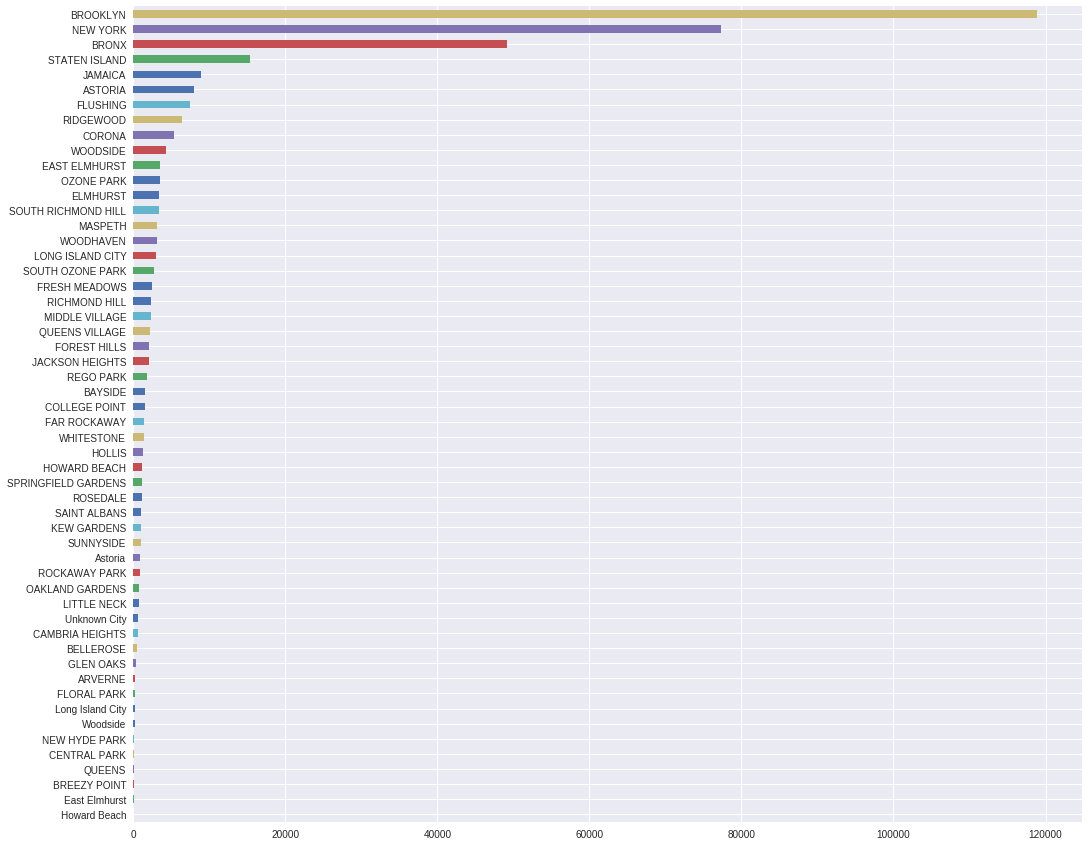

In [0]:
# A frequency plot for city
sns.set()
df['City'].value_counts().sort_values(ascending= True).plot(kind= 'barh', figsize=(17,15))
plt.show()

Brooklyn and New York  has the highest number fo complaints

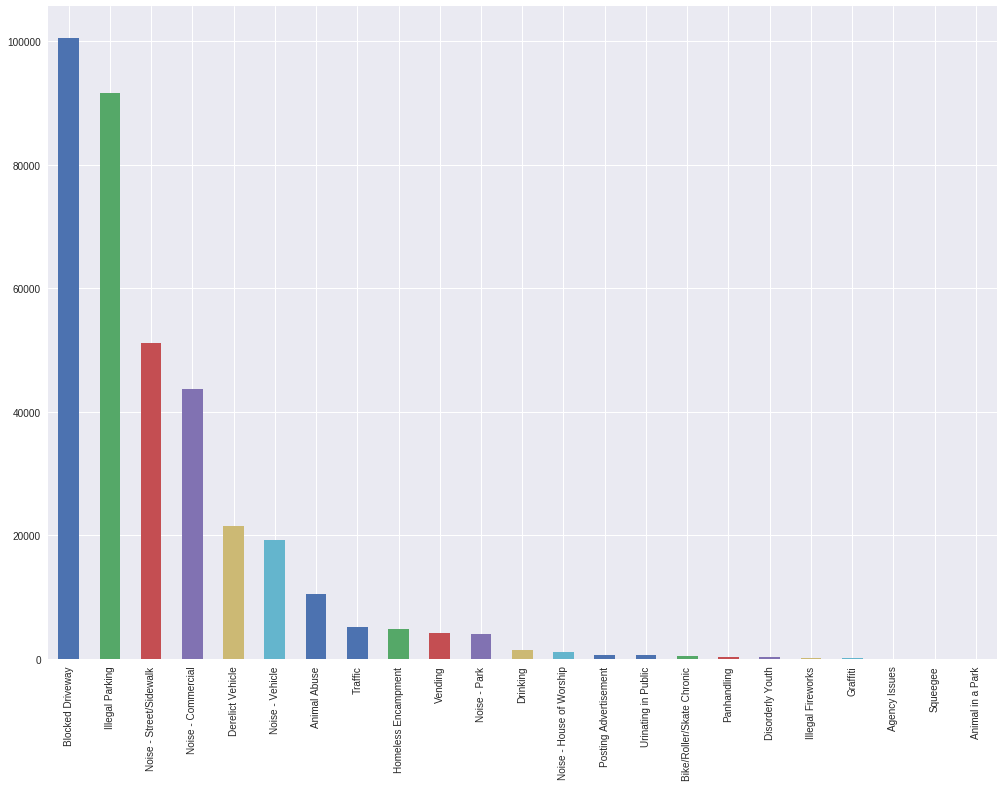

In [0]:
# A Frequncy Plot for Complaints Type
sns.set()
df['Complaint_Type'].value_counts().plot(kind= 'bar', figsize=(17,12))
plt.show()

Most complaints are of blocked driveway or illegal parking

In [0]:
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [0]:
# Frequency of complaint types for New York City
df.loc[df['City']== 'NEW YORK']['Complaint_Type'].value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint_Type, dtype: int64

In [0]:
# Top 10 Complaints by frequency
df['Complaint_Type'].value_counts()[0:10]

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint_Type, dtype: int64

In [0]:
top10_complaints= np.array(df['Complaint_Type'].value_counts()[0:10].index)

*Lets Explore More on City And Complaint Type*

In [0]:
df_new= pd.DataFrame()

In [0]:
for i in df['City'].unique():
    df_new[i]= df.loc[df['City']== i]['Complaint_Type'].value_counts()

In [0]:
df_new.head()

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,...,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,22245,409.0,9144.0,228.0,13982.0,13.0,238.0,38.0,64.0,81.0,...,3.0,NaN,105.0,1.0,6.0,145.0,28.0,5.0,NaN,NaN
Noise - Commercial,18686,1653.0,2944.0,85.0,13855.0,203.0,619.0,13.0,82.0,36.0,...,3.0,4.0,NaN,4.0,6.0,310.0,19.0,2.0,NaN,NaN
Illegal Parking,14549,1340.0,9889.0,760.0,33532.0,276.0,240.0,1104.0,640.0,237.0,...,72.0,32.0,5.0,16.0,10.0,277.0,64.0,124.0,28.0,NaN
Noise - Vehicle,6294,236.0,3556.0,69.0,5965.0,23.0,75.0,45.0,60.0,50.0,...,2.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
Homeless Encampment,3060,32.0,275.0,34.0,948.0,5.0,11.0,5.0,6.0,11.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


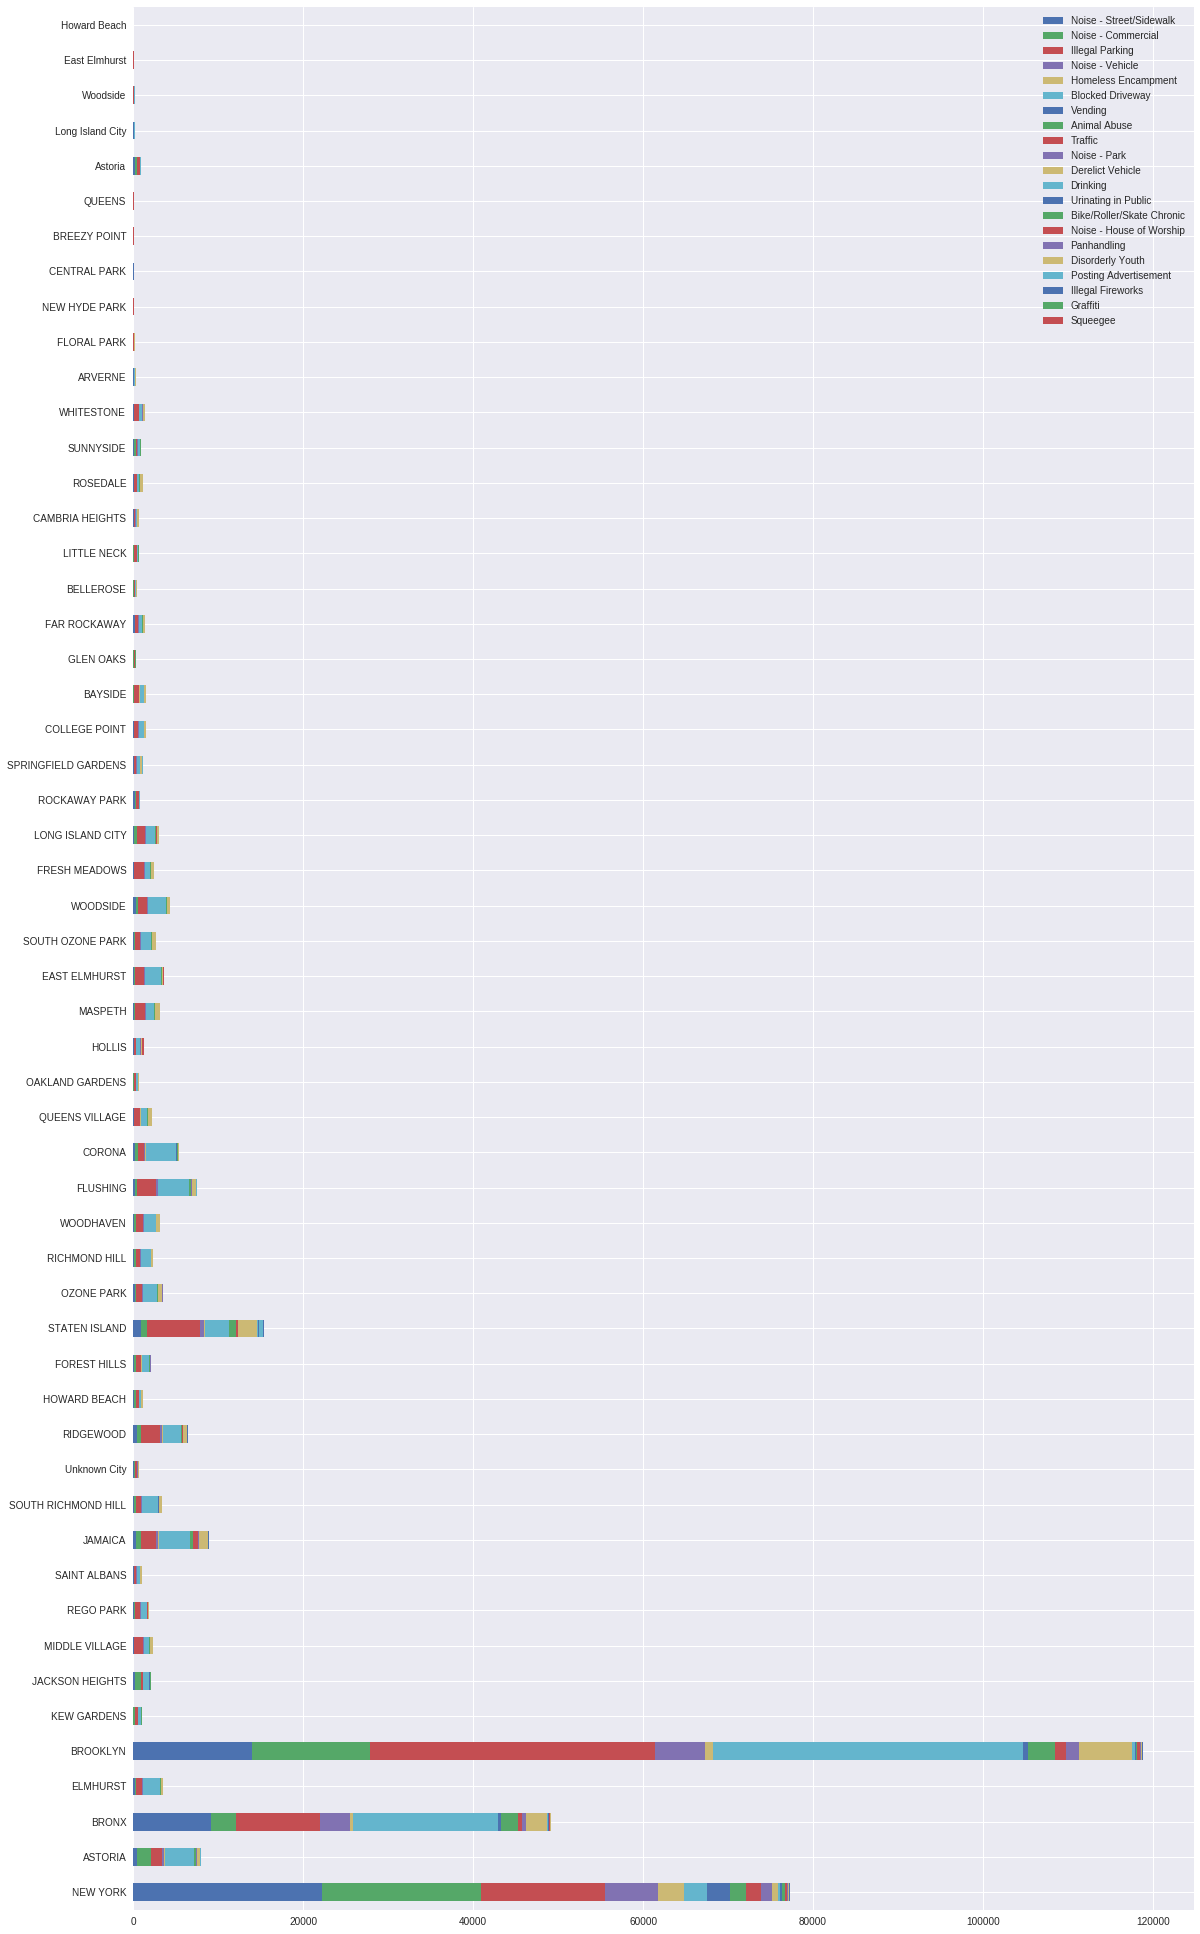

In [0]:
# Stacked Bar Chart of Complaint Types for each city
sns.set()
df_new.T.plot(kind= 'barh', stacked= True, figsize= (19, 35))
plt.show()

## Top Ten Complaints Type 

In [0]:
df['Complaint_Type'].value_counts()[0:10]

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint_Type, dtype: int64

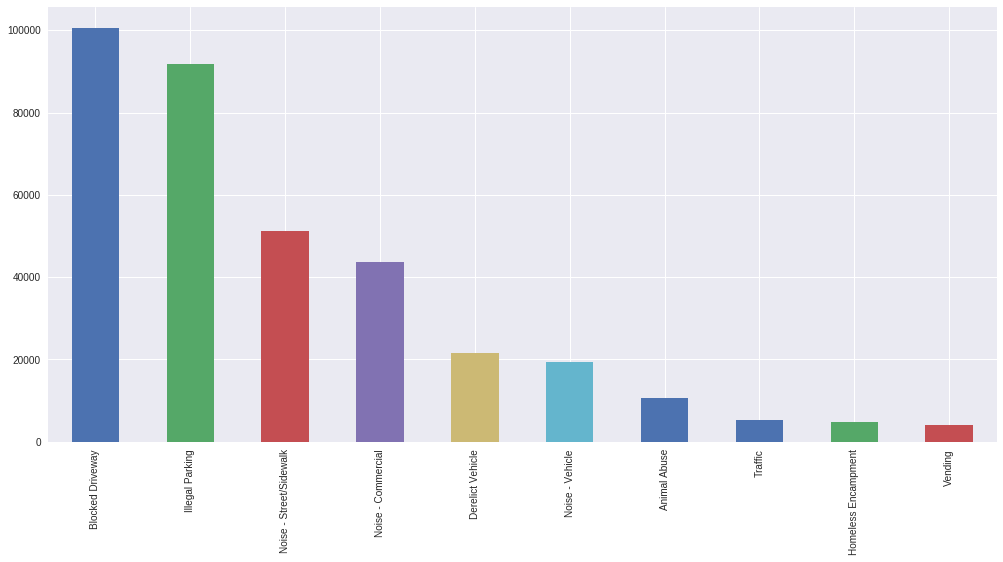

In [0]:
# Plot the top 10 complaints
sns.set()
df['Complaint_Type'].value_counts()[0:10].sort_values(ascending=False).plot(kind= 'bar', figsize=(17,8))
plt.show()

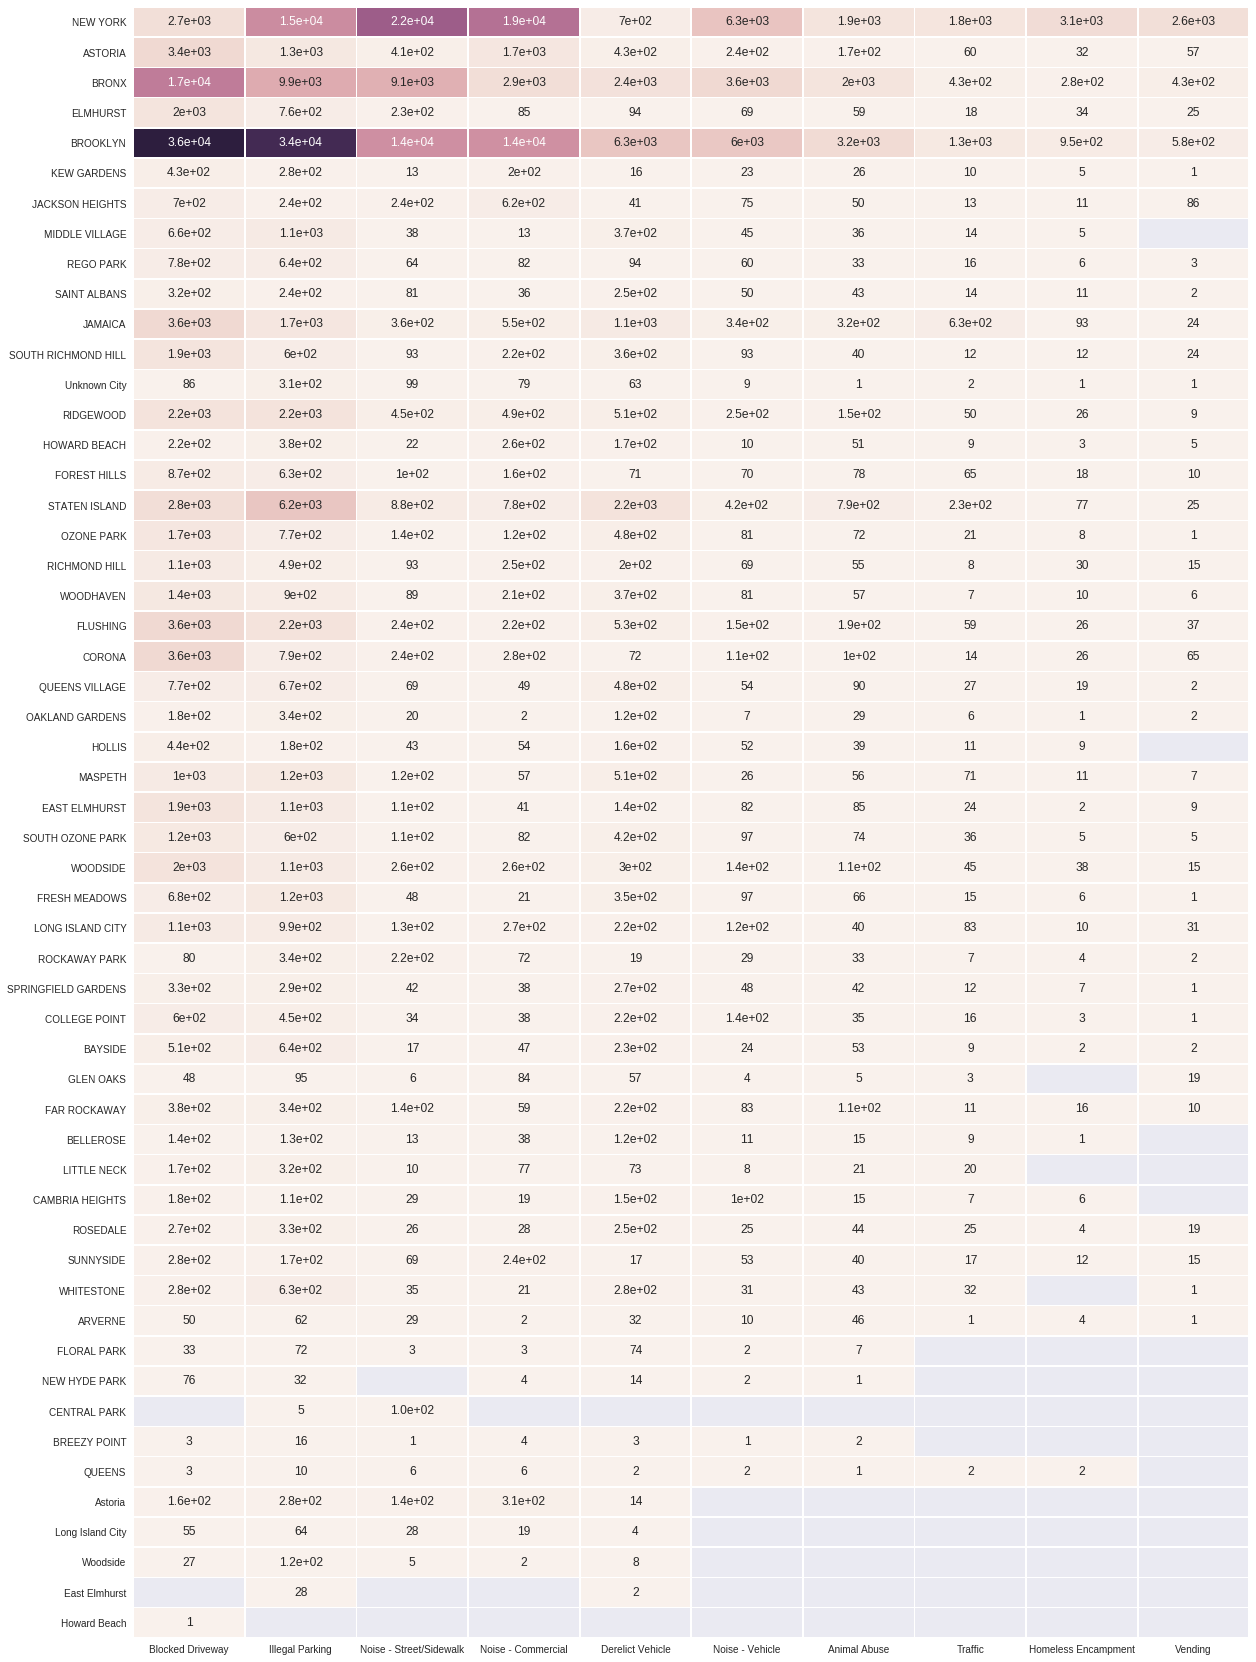

In [0]:
# Heat Map for top 10 types of Complaints in each city
df_new_T= df_new.T
sns.set()
f, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(df_new_T[top10_complaints], annot=True, cbar=False, linewidths=.8, ax=ax)
plt.show()

In [0]:
# Order the complaint types based on the average 'Request_Closing_Time' grouping them for different locations.
df.groupby(['City', 'Complaint_Type'], sort= True).Request_Closing_Time.mean()

City       Complaint_Type           
ARVERNE    Animal Abuse                  8399.195652
           Blocked Driveway              8318.840000
           Derelict Vehicle             11394.000000
           Disorderly Youth             12928.500000
           Drinking                       859.000000
           Graffiti                      5508.000000
           Homeless Encampment           6541.250000
           Illegal Parking               8406.080645
           Noise - Commercial            8234.000000
           Noise - House of Worship      6653.428571
           Noise - Park                  4638.000000
           Noise - Street/Sidewalk       7173.206897
           Noise - Vehicle               5673.600000
           Panhandling                   3673.000000
           Traffic                       4014.000000
           Urinating in Public           2491.000000
           Vending                       1735.000000
ASTORIA    Animal Abuse                 17206.882353
         

# 	Whether the average response time across complaint types are similar or not (overall)

In [0]:
df.groupby(['Complaint_Type'], sort= True).Request_Closing_Time.mean()

Complaint_Type
Agency Issues                1.828912e+04
Animal Abuse                 1.803256e+04
Animal in a Park             1.212634e+06
Bike/Roller/Skate Chronic    1.312369e+04
Blocked Driveway             1.623252e+04
Derelict Vehicle             2.535960e+04
Disorderly Youth             1.236375e+04
Drinking                     1.382130e+04
Graffiti                     2.327634e+04
Homeless Encampment          1.545138e+04
Illegal Fireworks            1.011348e+04
Illegal Parking              1.565044e+04
Noise - Commercial           1.108576e+04
Noise - House of Worship     1.139109e+04
Noise - Park                 1.222606e+04
Noise - Street/Sidewalk      1.223130e+04
Noise - Vehicle              1.256180e+04
Panhandling                  1.585355e+04
Posting Advertisement        7.286256e+03
Squeegee                     1.456025e+04
Traffic                      1.230912e+04
Urinating in Public          1.295929e+04
Vending                      1.436628e+04
Name: Request_Closi

In [0]:
df.Request_Closing_Time.describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

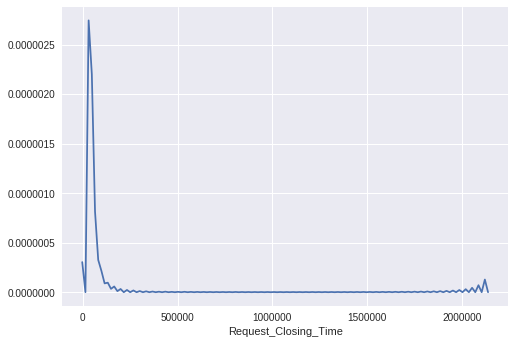

In [0]:
sns.set()
sns.distplot(df.Request_Closing_Time, hist= False)
plt.show()

### Shapiro- Wilk Test of Normality 

**H0: Request_Closing_Time feature is normal.**

In [0]:
#Check for nomality of Age
# Shapiro- Wilk Test
from scipy.stats import shapiro
stat, p= shapiro(df.Request_Closing_Time)
print(stat, p)

0.5136188268661499 0.0


*P value(0.0) returned is less than 0.05, then the null hypothesis is rejected and there is evidence that the data is not from a normally distributed population. now lets check for QQ Plots*

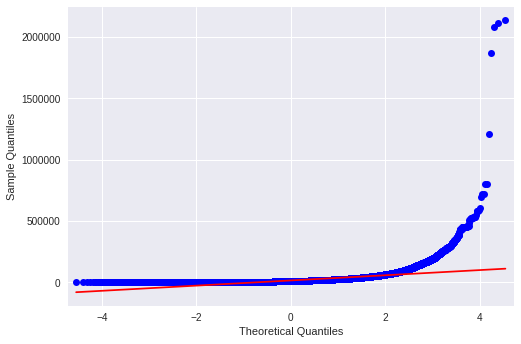

In [0]:
import statsmodels.api as sm
import pylab
sm.qqplot(df.Request_Closing_Time, loc = 4, scale = 3, line='s')
pylab.show()

*This QQ plot shows that that age column is not normally distributed*.
So to check	Whether the average response time across complaint types are similar or not (overall) we have to use non parametric test i.e. Kruskal-Wallis test

### Krushal Walis H Test
*Fail to Reject H0: All sample distributions are equal.*

*Reject H0: One or more sample distributions are not equal.*

In [0]:
Complaint_Types= df.Complaint_Type.unique()

In [0]:
len(Complaint_Types)

23

In [0]:
new= []
for i in Complaint_Types:
  new.append(df.loc[df['Complaint_Type']== i]['Request_Closing_Time'].ravel())

In [0]:
new[20]

array([27090., 37381.,  9736., 24686.,  4073., 10628., 30818.,  1901.])

In [0]:
from scipy.stats import kruskal
# compare samples
stat, p = kruskal(new[0],new[1], new[2],new[3], new[4], new[5], new[6], new[7], new[8], new[9], new[10], new[11], new[12], new[13], new[14], new[15], new[16], new[17], new[18], new[19],new[20], new[21], new[22])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=11988.269, p=0.000
Different distributions (reject H0)


*So,  we reject the H0 that means average response time across complaint types are not similar*

# Is the type of complaint or service requested and location related

### Chi-Squared Test of independence

**H0:There is no statistically significant relationship between City and Complaint Type.**

**Ha:There is a statistically significant relationship between City and Complaint Type.**

In [0]:
#contingency Table for complaints
contingency_table = pd.crosstab(df['City'],df['Complaint_Type'], margins= True)
contingency_table.head()

Complaint_Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending,All
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,1,4,...,2,29,10,1,0,0,1,1,1,259
ASTORIA,0,170,0,16,3436,426,5,43,4,32,...,64,409,236,2,3,0,60,10,57,7991
Astoria,0,0,0,0,159,14,0,0,0,0,...,0,145,0,0,0,0,0,0,0,905
BAYSIDE,0,53,0,0,514,231,2,1,3,2,...,4,17,24,0,0,0,9,0,2,1550
BELLEROSE,0,15,0,1,138,120,2,1,0,1,...,1,13,11,1,1,0,9,1,0,487


In [0]:
contingency_table.shape

(55, 24)

In [0]:
contingency_table.iloc[0:5][0:24].values

array([[   0,   46,    0,    0,   50,   32,    2,    1,    1,    4,    0,
          62,    2,   14,    2,   29,   10,    1,    0,    0,    1,    1,
           1,  259],
       [   0,  170,    0,   16, 3436,  426,    5,   43,    4,   32,    4,
        1340, 1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,
          57, 7991],
       [   0,    0,    0,    0,  159,   14,    0,    0,    0,    0,    0,
         277,  310,    0,    0,  145,    0,    0,    0,    0,    0,    0,
           0,  905],
       [   0,   53,    0,    0,  514,  231,    2,    1,    3,    2,    0,
         638,   47,    3,    4,   17,   24,    0,    0,    0,    9,    0,
           2, 1550],
       [   0,   15,    0,    1,  138,  120,    2,    1,    0,    1,    1,
         132,   38,    1,    1,   13,   11,    1,    1,    0,    9,    1,
           0,  487]])

In [0]:
f_obs= []
for i in range(0, contingency_table.shape[0]-1):
    f_obs.append(contingency_table.iloc[i][0:24].values)
f_obs= np.array(f_obs)
f_obs[0:5]

array([[   0,   46,    0,    0,   50,   32,    2,    1,    1,    4,    0,
          62,    2,   14,    2,   29,   10,    1,    0,    0,    1,    1,
           1,  259],
       [   0,  170,    0,   16, 3436,  426,    5,   43,    4,   32,    4,
        1340, 1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,
          57, 7991],
       [   0,    0,    0,    0,  159,   14,    0,    0,    0,    0,    0,
         277,  310,    0,    0,  145,    0,    0,    0,    0,    0,    0,
           0,  905],
       [   0,   53,    0,    0,  514,  231,    2,    1,    3,    2,    0,
         638,   47,    3,    4,   17,   24,    0,    0,    0,    9,    0,
           2, 1550],
       [   0,   15,    0,    1,  138,  120,    2,    1,    0,    1,    1,
         132,   38,    1,    1,   13,   11,    1,    1,    0,    9,    1,
           0,  487]])

In [0]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(145971.80461890678, 0.0, 1219)

**P-value is approximately zero. So we have evidence against the null hypothesis.**

With a p-value < 0.05 , we can reject the null hypothesis at 95% confidence Interval. There is definitely some sort of relationship between 'City' and the 'Complaint_Type' column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.